In [2]:
import numpy as np
import pandas as pd
import sklearn
import pickle

In [3]:
import matplotlib.pyplot as plt

### Import the dataset

In [4]:
dataTrain = pd.read_csv(r'C:\Users\Administrator\Music\final project\train.csv')
dataTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
datasub = pd.read_csv(r'C:\Users\Administrator\Music\final project\sample_submission.csv')
datasub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [6]:
dataTest = pd.read_csv(r'C:\Users\Administrator\Music\final project\test.csv')
dataTest.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


### Checking Correlation between labels and the target label.

In [7]:
THRESHOLD = 0.5

# Calculate the correlation matrix for numeric columns
numeric_data = dataTrain.select_dtypes(include=[np.number])
correlation_data = numeric_data.corr()["SalePrice"].sort_values(ascending=False)

# Initialize lists for labels and correlations
labels = []
corr = []

# Loop through the correlation data and apply the threshold
for feature in correlation_data.index[1:]:  # Skip the first entry, which is SalePrice itself
    if correlation_data[feature] > THRESHOLD:
        labels.append(feature)
        corr.append(correlation_data[feature])

# Print the labels and correlations that meet the threshold
print("Features with correlation higher than threshold:")
for label, correlation in zip(labels, corr):
    print(f"{label}: {correlation:.3f}")


Features with correlation higher than threshold:
OverallQual: 0.791
GrLivArea: 0.709
GarageCars: 0.640
GarageArea: 0.623
TotalBsmtSF: 0.614
1stFlrSF: 0.606
FullBath: 0.561
TotRmsAbvGrd: 0.534
YearBuilt: 0.523
YearRemodAdd: 0.507


In [8]:
import seaborn as sns

In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

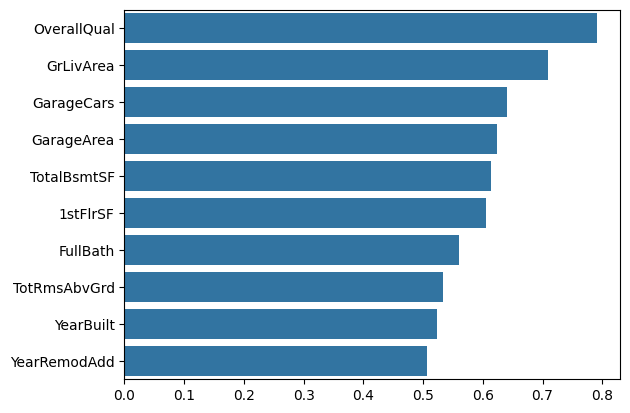

In [10]:
sns.barplot(x=corr, y=labels)

In [11]:
dataTest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
print(dataTrain.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


### Data preparation ( Drop unnecessary columns) 

In [13]:
unnecessary = []
lab = dataTrain.SalePrice
idCol = dataTest.Id
dataTrain = dataTrain.drop(columns=[str(item) for item in dataTrain.columns[1:] if str(item) not in labels])
dataTest = dataTest.drop(columns=[str(item) for item in dataTest.columns[1:] if str(item) not in labels])
dataTrain = dataTrain.drop(columns=['Id'])
dataTest = dataTest.drop(columns=['Id'])


In [14]:
dataTest.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0


In [15]:
datasub = datasub.drop(columns=['Id'])

### Fill all the null values 

In [16]:
dataTrain = dataTrain.fillna(method='bfill')
dataTest = dataTest.fillna(method='bfill')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17556\2375465390.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataTrain = dataTrain.fillna(method='bfill')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17556\2375465390.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataTest = dataTest.fillna(method='bfill')


In [17]:
dataTest.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0


### Checking if further NaN values persist.

In [18]:
sum(dataTrain.isnull().sum()), sum(dataTest.isnull().sum())

(0, 0)

In [19]:
yTrain = lab
xTest = dataTest.to_numpy()
xTrain = dataTrain.to_numpy()
yTest = datasub.to_numpy()

xTrain.shape, yTrain.shape, xTest.shape,yTest.shape

((1460, 10), (1460,), (1459, 10), (1459, 1))

In [20]:
yTest = yTest.flatten()

In [21]:
xTrain.shape, yTrain.shape, xTest.shape,yTest.shape

((1460, 10), (1460,), (1459, 10), (1459,))

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, max_depth=8, learning_rate=0.01)

# Fit the model to the training data
model.fit(xTrain, yTrain)

# Predict on the training data

preds = model.predict(xTrain)

# Calculate metrics
r2 = r2_score(yTrain, preds)
mse = mean_squared_error(yTrain, preds)
rmse = mse ** 0.5

# Print the metrics
print('R2 Score: ', r2)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)


R2 Score:  0.8343380544884403
Mean Squared Error:  1044794866.9790621
Root Mean Squared Error:  32323.28676015269


In [23]:
xTrain.shape

(1460, 10)

In [24]:
Final = pd.DataFrame(columns=["Id","SalePrice"])
Final["Id"] = idCol
Final["SalePrice"] = model.predict(xTest)
Final["Id"] = Final["Id"].astype(int)
Final

,Id,SalePrice
0,1461,146852.050162
1,1462,157010.782166
2,1463,168951.436371
3,1464,179795.051872
4,1465,216580.510225
...,...,...
1454,2915,117803.100066
1455,2916,119328.927975
1456,2917,161242.197850
1457,2918,141369.546153


In [25]:
pickle.dump(model, open('house_value_prediction_RF01.h5', 'wb'))

In [26]:
xTest

array([[5.000e+00, 1.961e+03, 1.961e+03, ..., 5.000e+00, 1.000e+00,
        7.300e+02],
       [6.000e+00, 1.958e+03, 1.958e+03, ..., 6.000e+00, 1.000e+00,
        3.120e+02],
       [5.000e+00, 1.997e+03, 1.998e+03, ..., 6.000e+00, 2.000e+00,
        4.820e+02],
       ...,
       [5.000e+00, 1.960e+03, 1.996e+03, ..., 7.000e+00, 2.000e+00,
        5.760e+02],
       [5.000e+00, 1.992e+03, 1.992e+03, ..., 6.000e+00, 0.000e+00,
        0.000e+00],
       [7.000e+00, 1.993e+03, 1.994e+03, ..., 9.000e+00, 3.000e+00,
        6.500e+02]])

In [27]:
dataTest

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,546.0,546,1092,1,5,0.0,0.0
1455,4,1970,1970,546.0,546,1092,1,6,1.0,286.0
1456,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0
1457,5,1992,1992,912.0,970,970,1,6,0.0,0.0
